In [23]:
#Import Required Libraries
import json
import requests
import matplotlib.pyplot as plt

In [24]:
# Define API endpoint and headers
api_url = "https://api.coingecko.com/api/v3/simple/price"
headers = {
    "Accepts": "application/json",
    "X-CMC_PRO_API_KEY": "YOUR_API_KEY"  # Make sure to replace with your actual API key
}

In [25]:
# Get user input for cryptocurrency symbols
symbols_input = input("Enter a comma-separated list of cryptocurrency symbols: ").upper().split(',')

# Map common symbol abbreviations to CoinGecko IDs (you might need to expand this list)
symbol_mapping = {
    "BTC": "bitcoin",  # IDs should be lowercase
    "ETH": "ethereum",
    "LTC": "litecoin"
}

Enter a comma-separated list of cryptocurrency symbols: BTC,ETH,LTC


In [26]:
# Translate user input to CoinGecko IDs (lowercase)
coin_ids = [symbol_mapping.get(symbol.strip(), symbol.strip().lower()) for symbol in symbols_input]

In [27]:
# Initialize portfolio dictionary and get quantities
portfolio = {}
for coin_id in coin_ids:
    quantity = float(input(f"Enter the quantity of {coin_id}: "))
    portfolio[coin_id] = {"quantity": quantity}


Enter the quantity of bitcoin: 2.5
Enter the quantity of ethereum: 5.0
Enter the quantity of litecoin: 10.0


In [28]:
# Prepare parameters for API request
params = {
    "ids": ",".join(portfolio.keys()),
    "vs_currencies": "usd"
}

In [29]:
# Fetch cryptocurrency data from API
response = requests.get(url=api_url, headers=headers, params=params)


Portfolio Summary:
- bitcoin: 2.5 @ $69432.00 = $173580.00
- ethereum: 5.0 @ $3688.59 = $18442.95
- litecoin: 10.0 @ $79.98 = $799.80

Total Portfolio Value: $192822.75


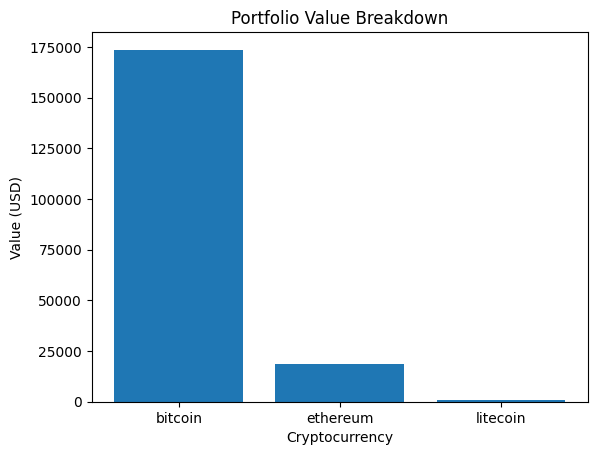

In [30]:
# Check if the API request was successful
if response.status_code == 200:
    data = json.loads(response.text)

    # Update portfolio with price and value
    for coin_id, info in portfolio.items():
        if coin_id in data:
            price = float(data[coin_id].get("usd", 0))
            info["price"] = price
            info["value"] = price * info["quantity"]
        else:
            print(f"Warning: Price not found for {coin_id}. Setting value to 0.")
            info["price"] = 0
            info["value"] = 0

    # Print portfolio summary
    total_value = 0
    print("\nPortfolio Summary:")
    for coin_id, info in portfolio.items():
        print(f"- {coin_id}: {info['quantity']} @ ${info['price']:.2f} = ${info['value']:.2f}")
        total_value += info["value"]

    print(f"\nTotal Portfolio Value: ${total_value:.2f}")

    # Data visualization
    coin_names = list(portfolio.keys())
    values = [info["value"] for info in portfolio.values()]

    fig, ax = plt.subplots()
    ax.bar(coin_names, values)
    plt.xlabel("Cryptocurrency")
    plt.ylabel("Value (USD)")
    plt.title("Portfolio Value Breakdown")
    plt.show()

else:
    print(f"Error fetching data. Status code: {response.status_code}")
    print(response.text)